In [ ]:
# Importando bibliotecas principais
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Carregar o dataset
df = pd.read_csv("creditcard_fraudes_3.0.csv")

# Exibir as primeiras linhas
df

,tempo,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,valor_gasto,classe,localizacao,categoria_compra,hora,tipo_transacao,id,nome,banco_emissor
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.021053,123436.5,0,Uíge,Educação,0,Compra online,2,Maria,Standard Bank Angola
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.014724,2219.2,0,Huíla,Lazer,0,Compra online,22,Andreia,Banco Keve
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.059752,312394.5,0,Lunda Sul,Restauração,0,Transferência,25,Bruno,Banco Keve
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.061458,101887.5,0,Lunda Sul,Telecomunicações,0,Transferência,49,Cristina,Banco BIC
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.215153,57741.8,0,Benguela,Automóveis,0,Levantamento,35,Hugo,Banco Económico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.823731,635.2,0,Malanje,Educação,23,Levantamento,47,Sofia,Standard Bank Angola
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.053527,20451.8,0,Huíla,Vestuário,23,Levantamento,24,Tatiana,Banco Angolano de Investimentos (BAI)
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.026561,56001.0,0,Moxico,Automóveis,23,Pagamento de serviço,46,Miguel,Banco de Fomento Angola (BFA)
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.104533,8250.0,0,Huíla,Eletrónicos,23,Pagamento de serviço,4,Ana,Banco Sol


Análise Exploratória

In [ ]:
# Obter informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tempo             284807 non-null  float64
 1   V1                284807 non-null  float64
 2   V2                284807 non-null  float64
 3   V3                284807 non-null  float64
 4   V4                284807 non-null  float64
 5   V5                284807 non-null  float64
 6   V6                284807 non-null  float64
 7   V7                284807 non-null  float64
 8   V8                284807 non-null  float64
 9   V9                284807 non-null  float64
 10  V10               284807 non-null  float64
 11  V11               284807 non-null  float64
 12  V12               284807 non-null  float64
 13  V13               284807 non-null  float64
 14  V14               284807 non-null  float64
 15  V15               284807 non-null  float64
 16  V16               28

In [ ]:
# Estatísticas descritivas
df.describe()

,tempo,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,valor_gasto,classe,hora,id
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,7.288844e+04,0.001727,14.046470,25.010744
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,2.063491e+05,0.041527,5.835854,14.150127
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000e+00,0.000000,0.000000,1.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,4.620000e+03,0.000000,10.000000,13.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,1.815000e+04,0.000000,15.000000,25.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,6.366110e+04,0.000000,19.000000,37.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,2.119521e+07,1.000000,23.000000,49.000000


In [ ]:
# Verificar valores nulos
df.isnull().sum()

,0
tempo,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Distribuição das classes
df['classe'].value_counts(normalize=True) * 100

,proportion
classe,
0,99.827251
1,0.172749


In [ ]:
# Visualizar quantidade de registros antes do tratamento
print("Registros antes da remoção de outliers:", len(df))

# Cálculo do IQR para a coluna 'valor_gasto'
Q1 = df['valor_gasto'].quantile(0.25)
Q3 = df['valor_gasto'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados removendo os outliers
df = df[(df['valor_gasto'] >= limite_inferior) & (df['valor_gasto'] <= limite_superior)]

# Visualizar quantidade de registros após remoção
print("Registros após remoção de outliers:", len(df))
df

Registros antes da remoção de outliers: 284807
Registros após remoção de outliers: 252903


,tempo,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,valor_gasto,classe,localizacao,categoria_compra,hora,tipo_transacao,id,nome,banco_emissor
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.021053,123436.5,0,Uíge,Educação,0,Compra online,2,Maria,Standard Bank Angola
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.014724,2219.2,0,Huíla,Lazer,0,Compra online,22,Andreia,Banco Keve
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.061458,101887.5,0,Lunda Sul,Telecomunicações,0,Transferência,49,Cristina,Banco BIC
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.215153,57741.8,0,Benguela,Automóveis,0,Levantamento,35,Hugo,Banco Económico
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.081080,3027.8,0,Cuanza Sul,Educação,0,Transferência,34,Daniela,Banco BIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.068803,2219.2,0,Huambo,Combustível,23,Levantamento,14,Joana,Banco Yetu
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.823731,635.2,0,Malanje,Educação,23,Levantamento,47,Sofia,Standard Bank Angola
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.053527,20451.8,0,Huíla,Vestuário,23,Levantamento,24,Tatiana,Banco Angolano de Investimentos (BAI)
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.026561,56001.0,0,Moxico,Automóveis,23,Pagamento de serviço,46,Miguel,Banco de Fomento Angola (BFA)


In [ ]:
# Verificar duplicados
duplicados = df.duplicated().sum()

# Remover duplicados
df.drop_duplicates()

print(f"Número de linhas duplicadas: {duplicados}\n")

# Estatísticas descritivas para "valor_gasto"
valor = df['valor_gasto'].describe()
print("\n Estatísticas Descritivas: \n",valor)

Número de linhas duplicadas: 0


 Estatísticas Descritivas: 
 count    252903.000000
mean      28854.286036
std       34792.105929
min           0.000000
25%        3704.200000
50%       13200.000000
75%       41241.800000
max      152212.500000
Name: valor_gasto, dtype: float64


In [ ]:
# Visualização
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

# Configurações para visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
colors = ['#3498db', '#e74c3c']

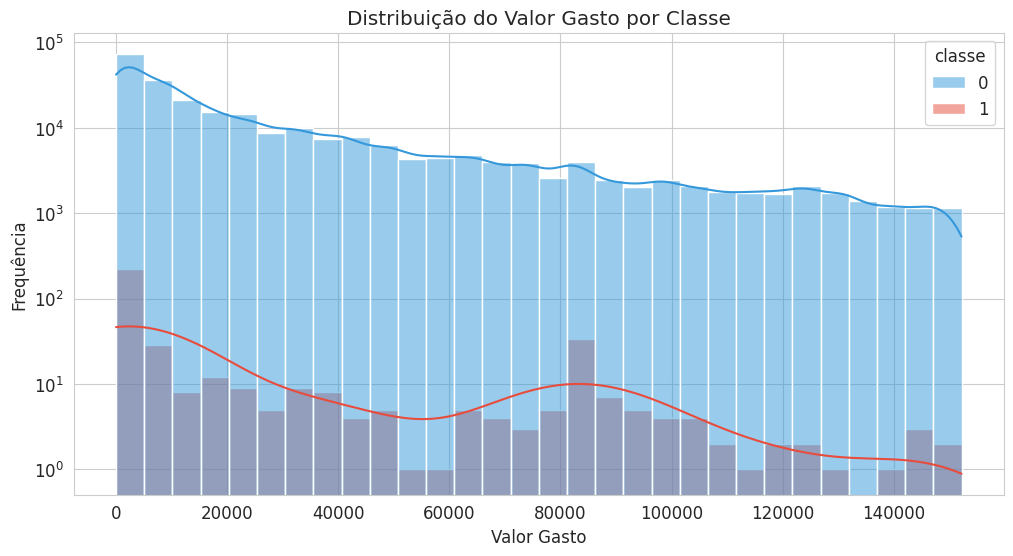

In [ ]:
# Histograma do valor gasto
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='valor_gasto', hue='classe', bins=30, kde=True, palette=colors)
plt.title('Distribuição do Valor Gasto por Classe')
plt.xlabel('Valor Gasto')
plt.ylabel('Frequência')
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.savefig('histograma_valor_gasto.png')
plt.show()

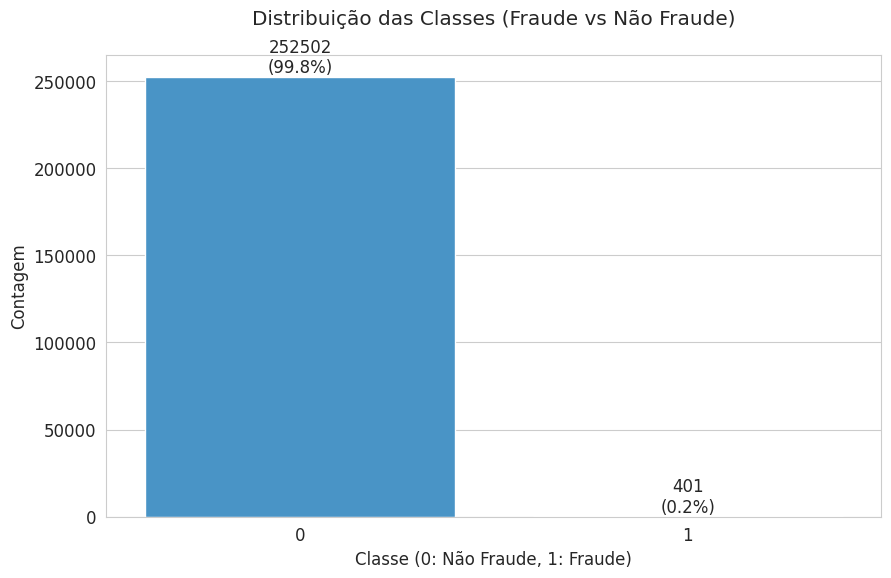

In [ ]:
# Distribuição da classe
plt.figure(figsize=(10, 6))
class_counts = df['classe'].value_counts()
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette=colors, hue=class_counts.index, legend=False)
plt.title('Distribuição das Classes (Fraude vs Não Fraude)\n')
plt.xlabel('Classe (0: Não Fraude, 1: Fraude)')
plt.ylabel('Contagem')
# Adicionando porcentagens
total = len(df)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{int(p.get_height())}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.savefig('distribuicao_classes.png')
plt.show()

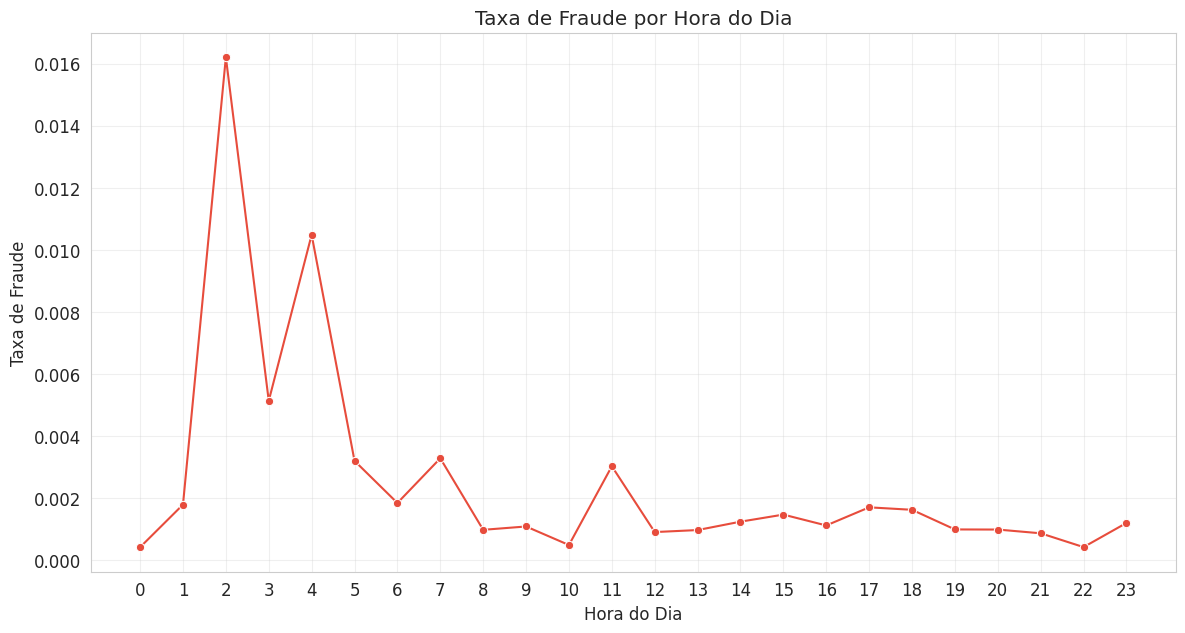

In [ ]:
# Taxa de fraude por hora do dia
fraud_by_hour = df.groupby('hora')['classe'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='hora', y='classe', data=fraud_by_hour, marker='o', color='#e74c3c')
plt.title('Taxa de Fraude por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Taxa de Fraude')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.savefig('fraude_por_hora.png')
plt.show()

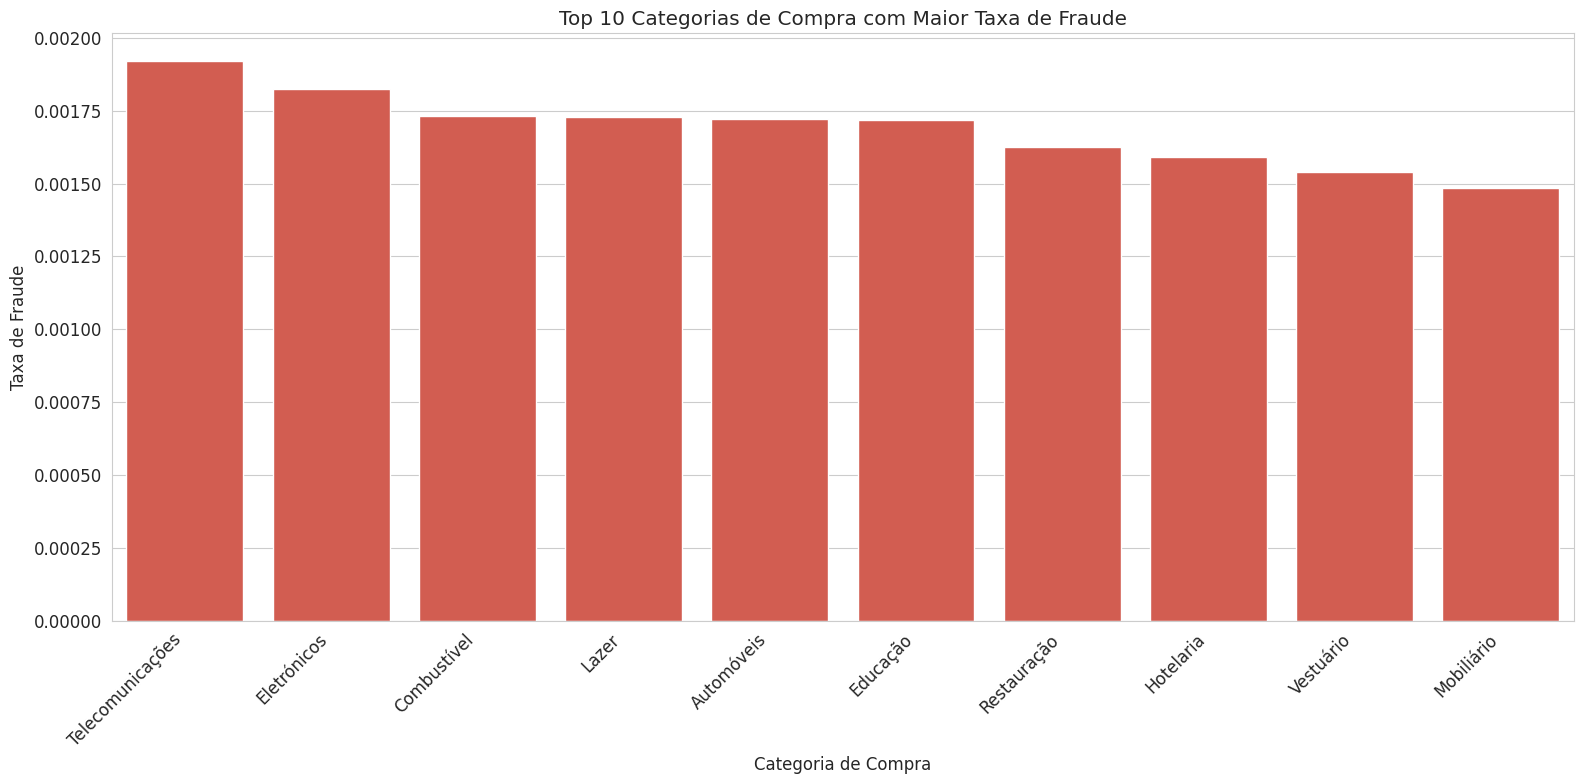

In [ ]:
# Taxa de fraude por categoria de compra
if 'categoria_compra' in df.columns:
    fraud_by_category = df.groupby('categoria_compra')['classe'].mean().reset_index()
    fraud_by_category = fraud_by_category.sort_values('classe', ascending=False)

    plt.figure(figsize=(16, 8))
    sns.barplot(x='categoria_compra', y='classe', data=fraud_by_category.head(10), color='#e74c3c')
    plt.title('Top 10 Categorias de Compra com Maior Taxa de Fraude')
    plt.xlabel('Categoria de Compra')
    plt.ylabel('Taxa de Fraude')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('fraude_por_categoria.png')
    plt.show()

In [ ]:
# === VALOR GASTO ===
df["log_valor_gasto"] = np.log1p(df["valor_gasto"])
df["valor_gasto_bin"] = pd.qcut(df["valor_gasto"], q=4, labels=["baixo", "medio", "alto", "muito_alto"])

# Média por cliente
media_cliente = df.groupby("nome")["valor_gasto"].transform("mean")
df["valor_relativo_cliente"] = df["valor_gasto"] / media_cliente
df["zscore_valor_cliente"] = (df["valor_gasto"] - media_cliente) / df.groupby("nome")["valor_gasto"].transform("std")

# === HORA ===
df["faixa_horaria"] = pd.cut(df["hora"], bins=[0,6,12,18,24], labels=["madrugada","manha","tarde","noite"], right=False)
df["hora_seno"] = np.sin(2 * np.pi * df["hora"]/24)
df["hora_cosseno"] = np.cos(2 * np.pi * df["hora"]/24)
df["is_fim_de_semana"] = (df["hora"].between(20,23)) | (df["hora"].between(0,6))

# === LOCALIZAÇÃO ===
df["mudanca_localizacao"] = df.groupby("nome")["localizacao"].shift() != df["localizacao"]

# === CATEGORIA ===
freq_categoria = df.groupby(["nome","categoria_compra"]).size().reset_index(name="freq")
df = df.merge(freq_categoria, on=["nome","categoria_compra"], how="left")

# === TIPO DE TRANSAÇÃO ===
df["is_online"] = df["tipo_transacao"].apply(lambda x: 1 if str(x).lower() in ["online","e-commerce"] else 0)

# === INTERAÇÕES ===
df["valor_x_riscohora"] = df["valor_gasto"] * df["is_fim_de_semana"].astype(int)
df["mudanca_x_valor"] = df["valor_gasto"] * df["mudanca_localizacao"].astype(int)
df["online_x_faixa"] = df["is_online"].astype(str) + "_" + df["faixa_horaria"].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

#Lista de colunas categóricas para codificação
categorical_cols = ["categoria_compra", "tipo_transacao", "localizacao", "banco_emissor", "faixa_horaria", "valor_gasto_bin", "online_x_faixa"]

#Aplicar Label Encoding nas colunas categóricas
label_encoders = {}
le = LabelEncoder()
for col in categorical_cols:
    df.loc[:, col] = le.fit_transform(df[col])  # Codifica os valores
    joblib.dump(le, f"encoder_{col}.pkl") # salvar cada encoder
df

/tmp/ipython-input-1257839358.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 2 2 2]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = le.fit_transform(df[col])  # Codifica os valores
/tmp/ipython-input-1257839358.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 1 3 ... 0 2 3]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = le.fit_transform(df[col])  # Codifica os valores


,tempo,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,faixa_horaria,hora_seno,hora_cosseno,is_fim_de_semana,mudanca_localizacao,freq,is_online,valor_x_riscohora,mudanca_x_valor,online_x_faixa
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,0.000000,1.000000,True,True,413,0,123436.5,123436.5,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,0.000000,1.000000,True,True,433,0,2219.2,2219.2,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,0.000000,1.000000,True,True,433,0,312394.5,312394.5,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,0.000000,1.000000,True,True,379,0,101887.5,101887.5,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,0.000000,1.000000,True,True,395,0,57741.8,57741.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,2,-0.258819,0.965926,True,True,416,0,635.2,635.2,2
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,2,-0.258819,0.965926,True,True,420,0,20451.8,20451.8,2
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,2,-0.258819,0.965926,True,True,436,0,56001.0,56001.0,2
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,2,-0.258819,0.965926,True,True,405,0,8250.0,8250.0,2


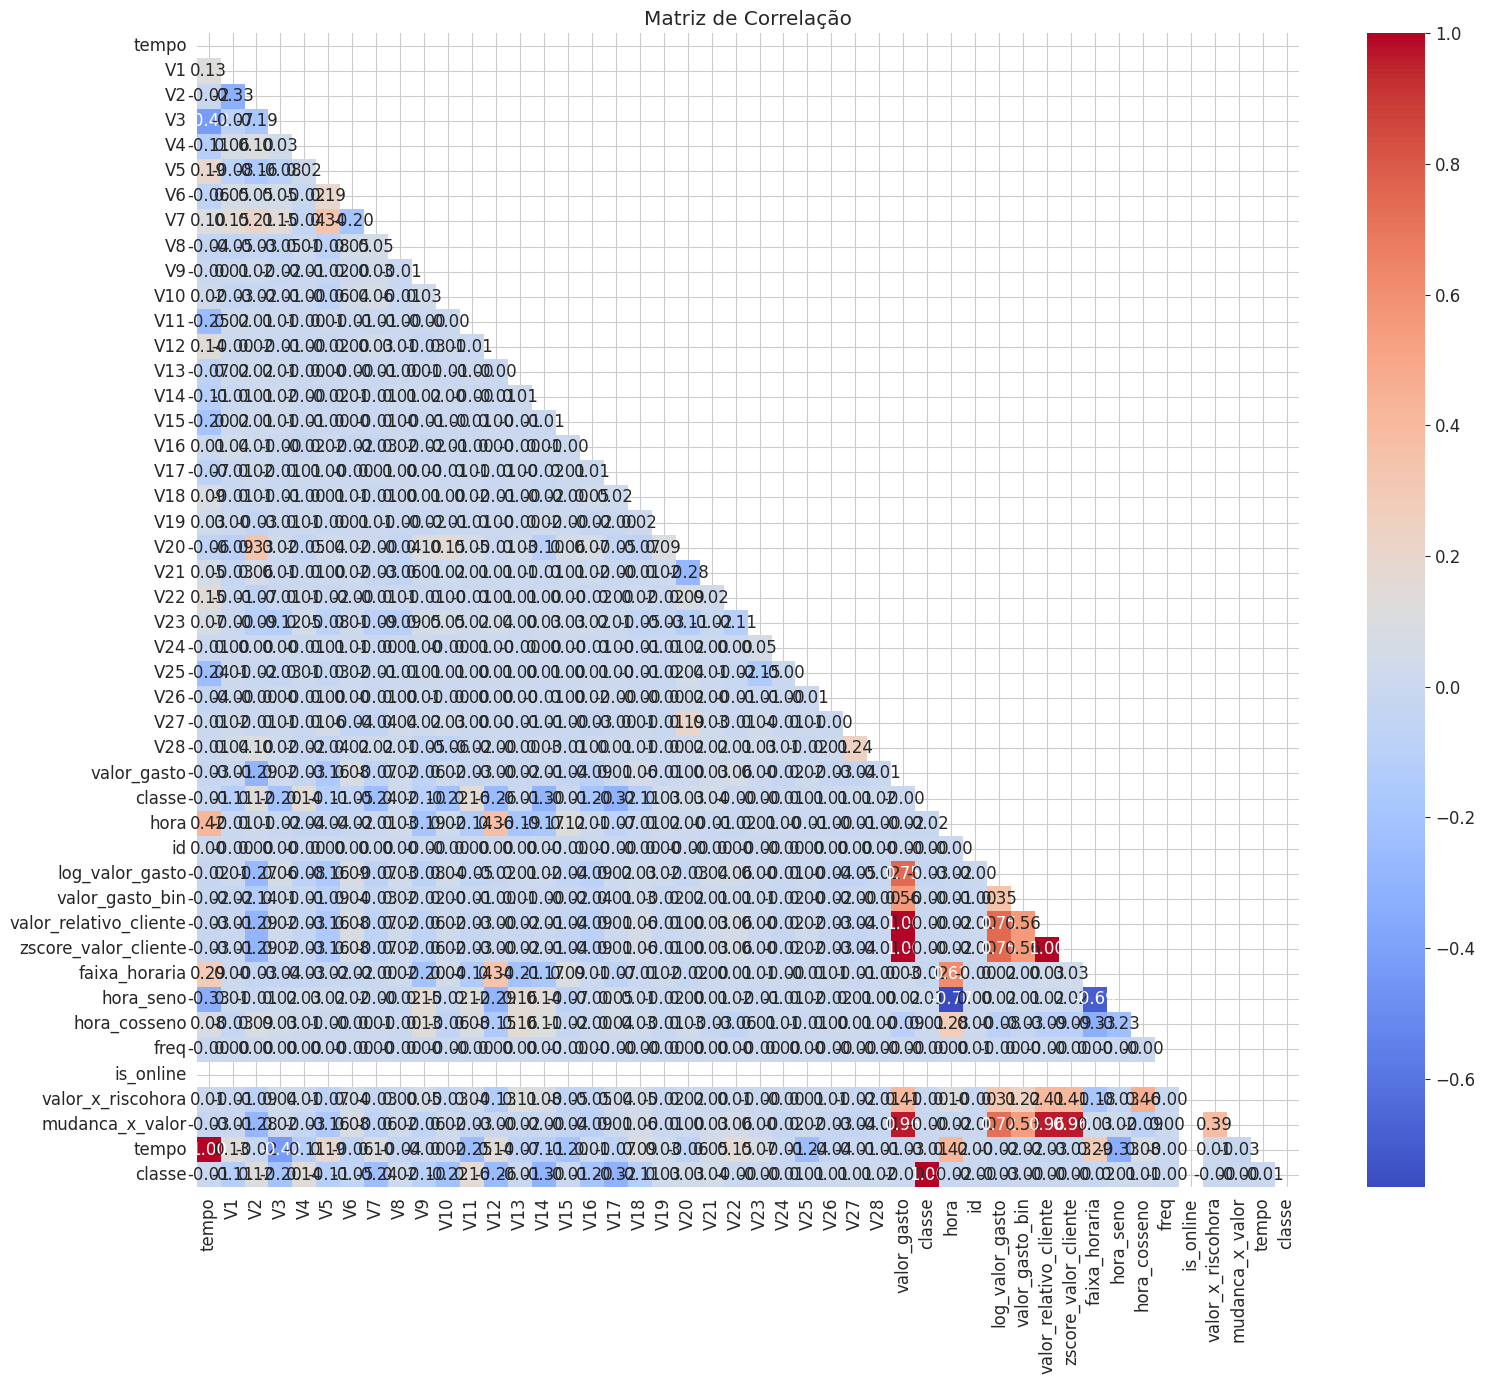

In [ ]:
# Definir colunas numéricas automaticamente
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Criar lista de colunas para correlação
corr_cols = numeric_cols + [col for col in df.columns if '_encoded' in col or col in ['tempo', 'classe']]

# Matriz de correlação
correlation = df[corr_cols].corr()

plt.figure(figsize=(16, 14))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.savefig('matriz_correlacao.png')
plt.show()

In [ ]:
# Pré-processamento e amostragem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# 1. Ajustar o scaler e transformar a coluna
scaler = StandardScaler()
df['valor_gasto'] = scaler.fit_transform(df[['valor_gasto']])

# 2. Verificar info e shape
info = df.info()
shape = df.shape

# 3. Salvar o scaler treinado
joblib.dump(scaler, "scaler_valor_gasto.pkl")

info, shape, df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 252903 entries, 0 to 284805
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tempo             252903 non-null  float64
 1   V1                252903 non-null  float64
 2   V2                252903 non-null  float64
 3   V3                252903 non-null  float64
 4   V4                252903 non-null  float64
 5   V5                252903 non-null  float64
 6   V6                252903 non-null  float64
 7   V7                252903 non-null  float64
 8   V8                252903 non-null  float64
 9   V9                252903 non-null  float64
 10  V10               252903 non-null  float64
 11  V11               252903 non-null  float64
 12  V12               252903 non-null  float64
 13  V13               252903 non-null  float64
 14  V14               252903 non-null  float64
 15  V15               252903 non-null  float64
 16  V16               252903 

/tmp/ipython-input-3080378297.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valor_gasto'] = scaler.fit_transform(df[['valor_gasto']])


(None,
 (252903, 38),
    tempo        V1        V2        V3        V4        V5        V6  \
 0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
 1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
 3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
 4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
 5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
 
          V7        V8        V9  ...       V28  valor_gasto  classe  \
 0  0.239599  0.098698  0.363787  ... -0.021053     2.718502       0   
 1 -0.078803  0.085102 -0.255425  ...  0.014724    -0.765551       0   
 3  0.237609  0.377436 -1.387024  ...  0.061458     2.099136       0   
 4  0.592941 -0.270533  0.817739  ...  0.215153     0.830291       0   
 5  0.476201  0.260314 -0.568671  ...  0.081080    -0.742310       0   
 
    localizacao  categoria_compra  hora  tipo_transacao  id      nome  \
 0         Uíge          Educaç


Realizando seleção de features com ANOVA F-value...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Top features selecionadas pelo ANOVA F-test:
   Feature         Score
17     V17  28242.126228
14     V14  25393.496972
12     V12  18108.774817
7       V7  15279.514550
10     V10  12511.209669
3       V3  11080.877544
16     V16  10471.651527
11     V11   6243.750942
4       V4   4827.718613
2       V2   3857.678173


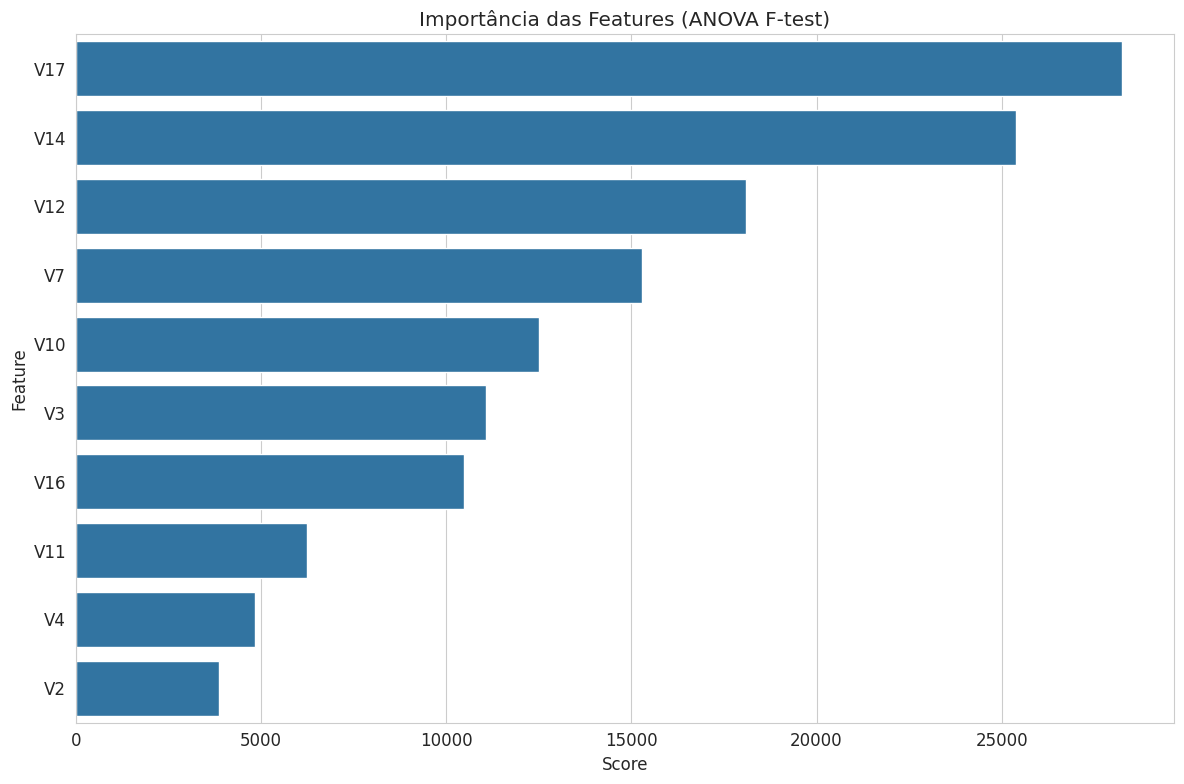

In [ ]:
# 5.2 Seleção baseada em testes estatísticos (ANOVA F-value)
print("\nRealizando seleção de features com ANOVA F-value...")
try:
    # Preparando dados para seleção de features
    X = df[corr_cols].drop('classe', axis=1)
    y = df['classe']

    # Aplicando SelectKBest
    k = min(10, len(X.columns))  # Selecionando top-k features ou todas se houver menos que k
    selector = SelectKBest(f_classif, k=k)
    X_new = selector.fit_transform(X, y)

    # Features selecionadas
    selected_features = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)

    print("\nTop features selecionadas pelo ANOVA F-test:")
    print(selected_features.head(10))

    # Visualizando importância das features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Score', y='Feature', data=selected_features.head(10))
    plt.title('Importância das Features (ANOVA F-test)')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
except Exception as e:
    print(f"Erro na seleção de features com ANOVA: {e}")


=== ANÁLISE DE COMPONENTES PRINCIPAIS ===


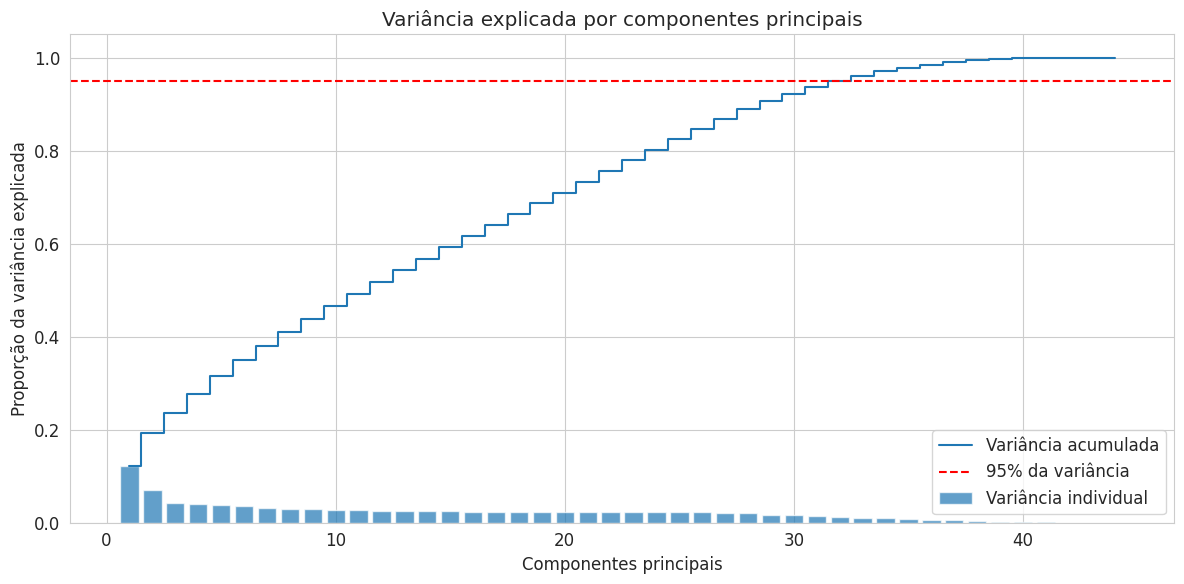


Número de componentes para explicar 95% da variância: 32


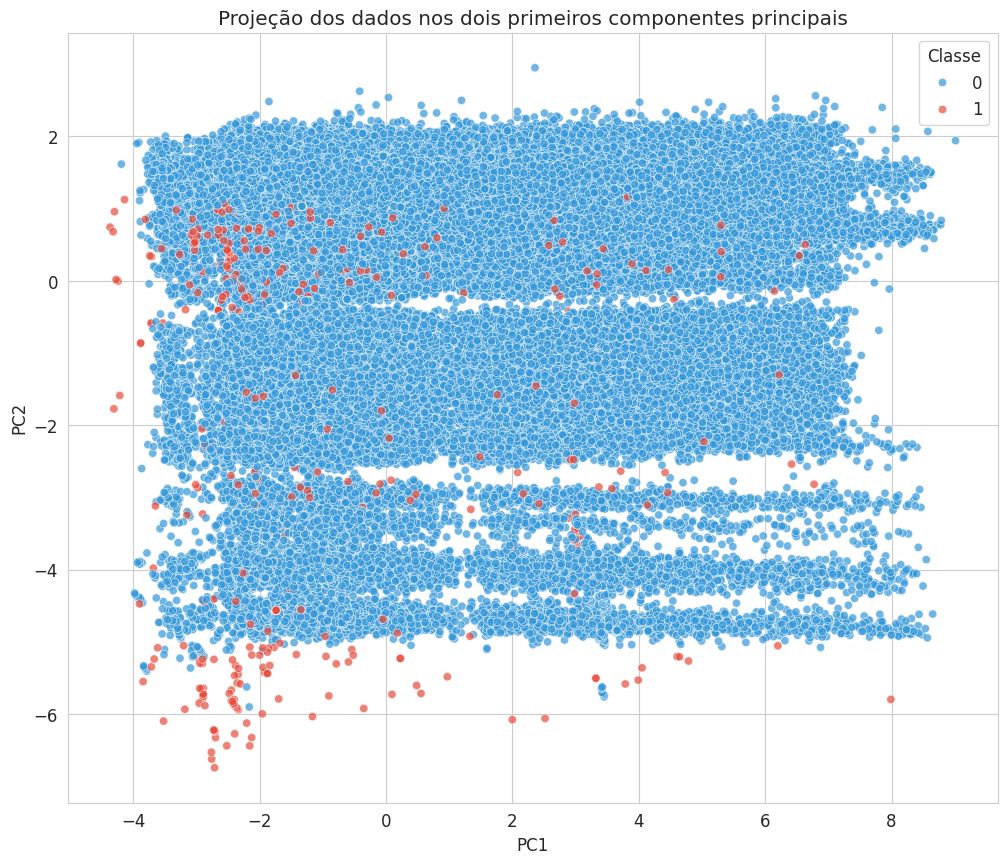

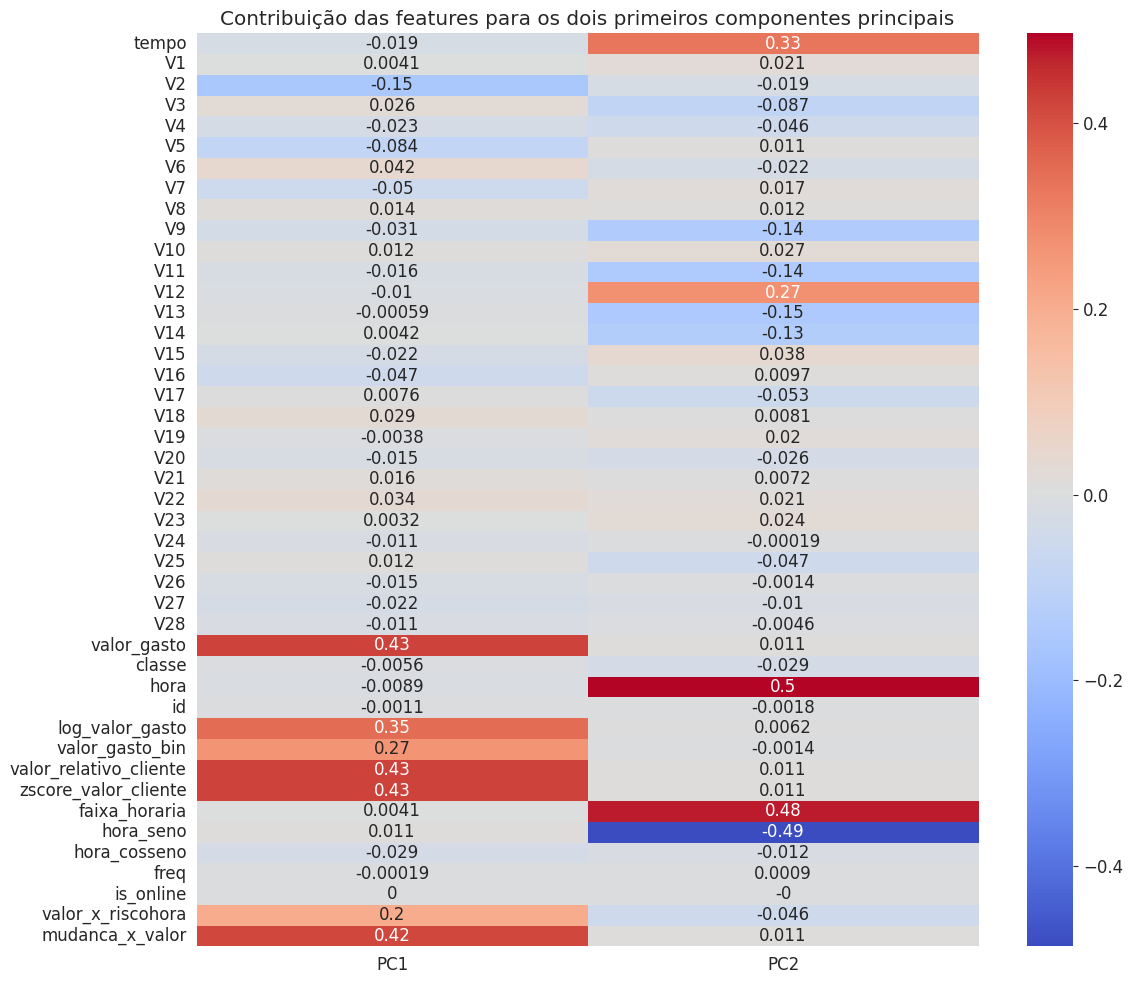

In [ ]:
print("\n=== ANÁLISE DE COMPONENTES PRINCIPAIS ===")

try:
    # Selecionando apenas features numéricas para PCA
    pca_features = df[numeric_cols]

    # Escalonando os dados
    scaler = StandardScaler()
    pca_features_scaled = scaler.fit_transform(pca_features)

    # Aplicando PCA
    pca = PCA()
    pca_result = pca.fit_transform(pca_features_scaled)

    # Variância explicada
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
        # Visualizando variância explicada
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Variância individual')
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Variância acumulada')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% da variância')
    plt.ylabel('Proporção da variância explicada')
    plt.xlabel('Componentes principais')
    plt.title('Variância explicada por componentes principais')
    plt.legend()
    plt.tight_layout()
    plt.savefig('pca_variance.png')
    plt.show()

    # Determinando número de componentes para explicar 95% da variância
    n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
    print(f"\nNúmero de componentes para explicar 95% da variância: {n_components_95}")

    # Projeção dos dados nos primeiros dois componentes principais
    if len(pca_result) > 1:  # Verificando se temos pelo menos 2 componentes
        pca_df = pd.DataFrame({
            'PC1': pca_result[:, 0],
            'PC2': pca_result[:, 1],
            'Classe': df['classe']
        })

        plt.figure(figsize=(12, 10))
        sns.scatterplot(x='PC1', y='PC2', hue='Classe', data=pca_df, palette=colors, alpha=0.7)
        plt.title('Projeção dos dados nos dois primeiros componentes principais')
        plt.savefig('pca_projection.png')
        plt.show()

    # Contribuição das features para os dois primeiros componentes
    if len(pca.components_) >= 2:
        loadings = pd.DataFrame(
            pca.components_.T[:, :2],
            columns=['PC1', 'PC2'],
            index=pca_features.columns
        )

        plt.figure(figsize=(12, 10))
        sns.heatmap(loadings, annot=True, cmap='coolwarm')
        plt.title('Contribuição das features para os dois primeiros componentes principais')
        plt.tight_layout()
        plt.savefig('pca_loadings.png')
        plt.show()
except Exception as e:
    print(f"Erro na análise de componentes principais: {e}")

Separação dos Dados de Treino, Teste e Validação

In [ ]:
# Separar variáveis preditoras (X) e alvo (y)
X = df.drop(columns=["id", "nome", "classe", "tempo"])  # Removemos 'id' e 'nome' pois não são úteis para o modelo
y = df["classe"]  # Variável alvo

# Dividir em treino, teste e validação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

print(f"Treino: {X_train.shape}, Teste: {X_test.shape}, Validação: {X_val.shape}")

# Aplicar SMOTE apenas ao conjunto de treino
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f"Após SMOTE: {X_train_sm.shape}, Fraudes balanceadas: {sum(y_train_sm)}")

Treino: (202322, 48), Teste: (40464, 48), Validação: (10117, 48)
Após SMOTE: (404002, 48), Fraudes balanceadas: 202001


In [ ]:
# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Métricas
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

Treinamento dos Modelos

In [ ]:
# Função para avaliar o modelo
def avaliar(modelo, X, y, conjunto_nome):
    y_pred = modelo.predict(X)
    print(f"\n=== {conjunto_nome.upper()} ===")
    print(classification_report(y, y_pred, digits=4))

    # Matriz de confusão
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {conjunto_nome}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

In [ ]:
def avaliar_modelo(modelo, X, y, nome_dataset):
    y_pred = modelo.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f"\n📊 Avaliação no conjunto {nome_dataset}:")
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))

Dados de Treino

In [ ]:
# Treinar o modelo Random Forest
rf = RandomForestClassifier(
    class_weight="balanced",  # dá mais peso à classe fraude
    random_state=42
)

rf.fit(X_train_sm, y_train_sm)

# Treino
print('RANDOM FOREST')
avaliar(rf, X_train, y_train, 'Treino')

# Teste
print('RANDOM FOREST')
avaliar(rf, X_test, y_test, 'Teste')

# Validação
print('RANDOM FOREST')
avaliar(rf, X_val, y_val, 'Validação')

In [ ]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(
    n_neighbors=3,
    weights="distance",
    algorithm="auto",
)

knn.fit(X_train_sm, y_train_sm)

# Treino
print('KNN')
avaliar(knn, X_train, y_train, 'Treino')

# Teste
print('KNN')
avaliar(knn, X_test, y_test, 'Teste')

# Validação
print('KNN')
avaliar(knn, X_val, y_val, 'Validação')

In [ ]:
# Treinar o modelo SVM
svm = SVC(
    class_weight="balanced",
    random_state=42
)

svm.fit(X_train_sm, y_train_sm)

# Treino
print('SVM')
avaliar(svm, X_train, y_train, 'Treino')

# Teste
print('SVM')
avaliar(svm, X_test, y_test, 'Teste')

# Validação
print('SVM')
avaliar(svm, X_val, y_val, 'Validação')

In [ ]:
import joblib
joblib.dump(rf, "modelo_fraude_rf.pkl")#Salva o modelo de Random Forest no arquivo "modelo_fraude_rf.pkl"

In [ ]:
# Criando DataFrame de comparação
df_comparacao = pd.DataFrame({
    'Classe Real': y_test,
    'Classe Prevista': y_pred
})

# Exibindo as primeiras linhas da comparação
print("Comparação entre classes reais e previstas:")
print(df_comparacao.head(10))

# Calculando métricas de avaliação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Calculando acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {acuracia:.4f} ({acuracia*100:.2f}%)")

# Visualizando onde o modelo errou
erros = df_comparacao[df_comparacao['Classe Real'] != df_comparacao['Classe Prevista']]
print(f"\nExemplos onde o modelo errou ({len(erros)} de {len(y_test)}):")
print(erros.head(10) if len(erros) > 0 else "Não houve erros nos dados de teste!")

Comparação entre classes reais e previstas:
        Classe Real  Classe Prevista
34678             0                0
188342            0                0
61431             0                0
18111             0                0
53222             0                0
59574             0                0
26307             0                0
21361             0                0
29587             0                0
224596            0                0

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40400
           1       0.89      0.88      0.88        64

    accuracy                           1.00     40464
   macro avg       0.94      0.94      0.94     40464
weighted avg       1.00      1.00      1.00     40464


Acurácia do modelo: 0.9996 (99.96%)

Exemplos onde o modelo errou (15 de 40464):
        Classe Real  Classe Prevista
8950              0                1
17011             1                0


In [ ]:
# Probabilidades para AUC-ROC
if hasattr(rf, "predict_proba"):
    y_proba = rf.predict_proba(X_test)[:, 1]  # probabilidade da classe 1 (fraude)
elif hasattr(rf, "decision_function"):
    y_proba = rf.decision_function(X_test)    # para modelos como SVM
else:
    raise ValueError("O modelo não tem método para probabilidades.")

# === MATRIZ DE CONFUSÃO ===
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)
print(f"""
True Negatives (TN): {cm[0,0]}
False Positives (FP): {cm[0,1]}
False Negatives (FN): {cm[1,0]}
True Positives (TP): {cm[1,1]}
""")

# === RELATÓRIO COMPLETO ===
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, digits=4))

# === AUC ROC ===
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.4f}")


Matriz de Confusão:
[[40393     7]
 [    8    56]]

True Negatives (TN): 40393
False Positives (FP): 7
False Negatives (FN): 8
True Positives (TP): 56


Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9998    0.9998    0.9998     40400
           1     0.8889    0.8750    0.8819        64

    accuracy                         0.9996     40464
   macro avg     0.9443    0.9374    0.9409     40464
weighted avg     0.9996    0.9996    0.9996     40464

AUC-ROC: 0.9907


In [ ]:
y_proba = rf.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1
df_comparacao['Probabilidade Fraude'] = y_proba

print(df_comparacao)

        Classe Real  Classe Prevista  Probabilidade Fraude
34678             0                0                  0.01
188342            0                0                  0.00
61431             0                0                  0.00
18111             0                0                  0.00
53222             0                0                  0.00
...             ...              ...                   ...
128698            0                0                  0.00
126               0                0                  0.01
10079             0                0                  0.00
55429             0                0                  0.00
4596              0                0                  0.00

[40464 rows x 3 columns]


In [ ]:
# Selecionar apenas as transações com probabilidade > 75%
df_alto_risco = df_comparacao[df_comparacao['Probabilidade Fraude'] > 0.75]

# Mostrar as primeiras linhas filtradas
print(df_alto_risco.head(20))

# Quantas transações suspeitas
print(f"\nTotal de transações com probabilidade > 75%: {len(df_alto_risco)}")

        Classe Real  Classe Prevista  Probabilidade Fraude
137369            1                1                  0.98
133615            1                1                  0.99
55943             1                1                  1.00
157528            1                1                  0.92
100385            1                1                  0.93
67143             1                1                  0.96
84816             1                1                  0.97
89745             1                1                  0.92
215236            1                1                  0.97
137061            1                1                  0.92
9976              1                1                  0.95
137337            1                1                  0.80
14008             1                1                  0.98
11366             1                1                  0.98
61031             1                1                  0.96
46285             1                1                  0.

In [ ]:
# Salvar em CSV
df.to_csv("credit_card_fraude1.csv", index=False, encoding="utf-8")

print("✅ Dataset salvo em 'credit_card_fraude1.csv'")

In [ ]:
df